In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data = pd.read_csv("data/us_monthly_gas.csv")
data.head()

,date,y
0,2001-01-01,2676998
1,2001-02-01,2309464
2,2001-03-01,2246633
3,2001-04-01,1807170
4,2001-05-01,1522382


In [3]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.head()

,y
date,
2001-01-01,2676998
2001-02-01,2309464
2001-03-01,2246633
2001-04-01,1807170
2001-05-01,1522382


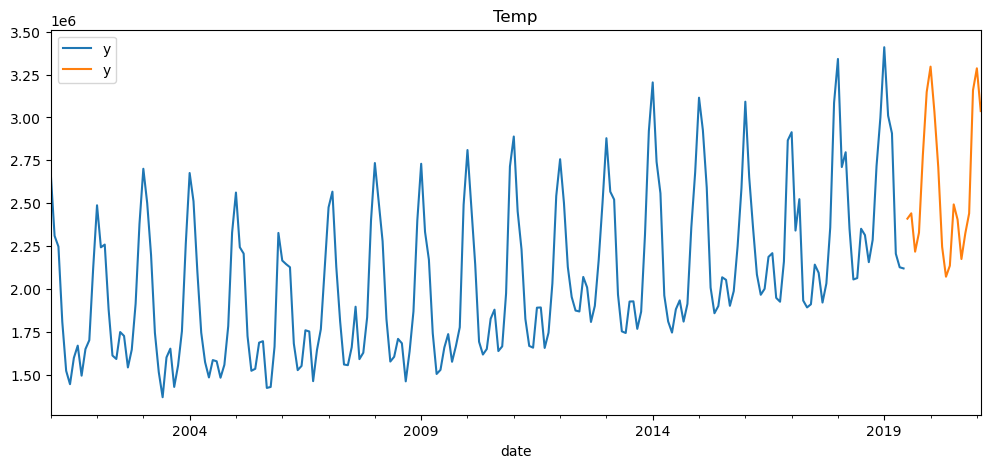

In [4]:
tst_size = 20
trn, tst = data[:-tst_size], data[-tst_size:]

ax = trn.plot(title="Temp", label='trn', figsize=(12,5))
tst.plot(label='tst', ax=ax)
plt.legend()
plt.show()

ADF Statistic: -0.1925724092280395
p-value: 0.9394011946876784
Critical Values:
	1%: -3.4594900381360034
	5%: -2.8743581895178485
	10%: -2.573601605503697


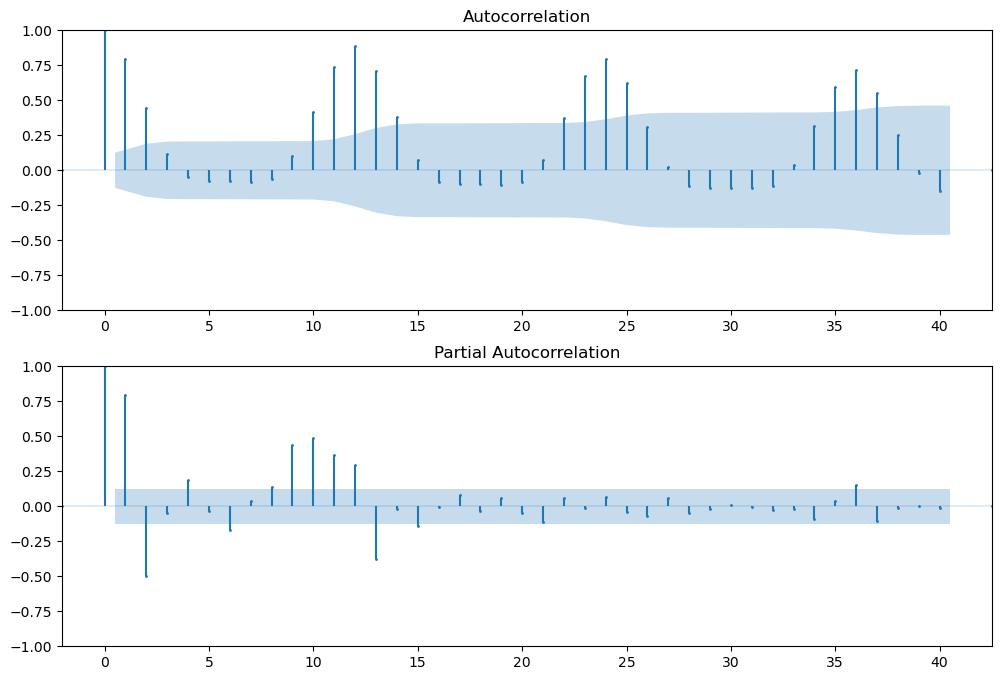

In [5]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data.values, lags=40, ax=ax1, marker='o', markersize=1,  linewidth=0.2)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data.values, lags=40, ax=ax2, marker='o', markersize=1,  linewidth=0.2)

adf = adfuller(data)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

In [6]:
data11 = data.diff(1)


In [7]:
data11 = data11.dropna()

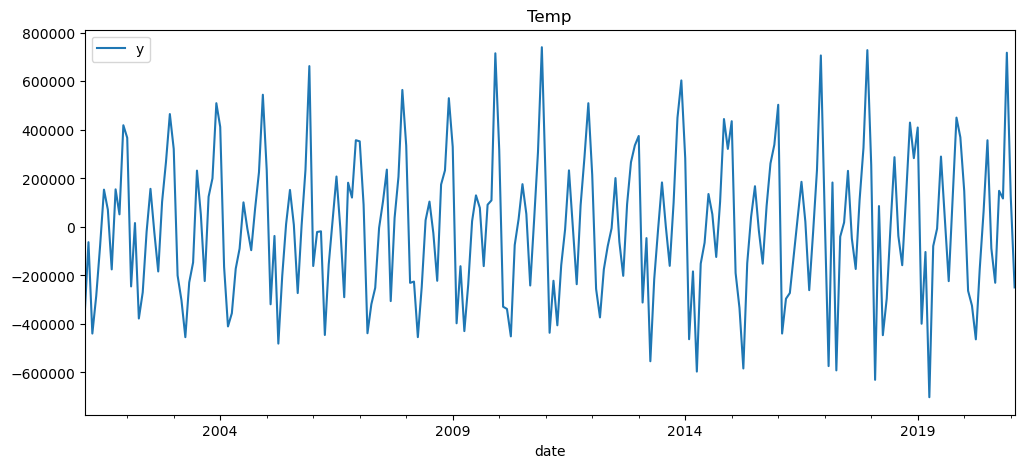

In [8]:
ax = data11.plot(title="Temp", label='trn', figsize=(12,5))
#data.plot(label='tst', ax=ax)
plt.legend()
plt.show()

ADF Statistic: -5.185864304089184
p-value: 9.395509412663508e-06
Critical Values:
	1%: -3.4594900381360034
	5%: -2.8743581895178485
	10%: -2.573601605503697


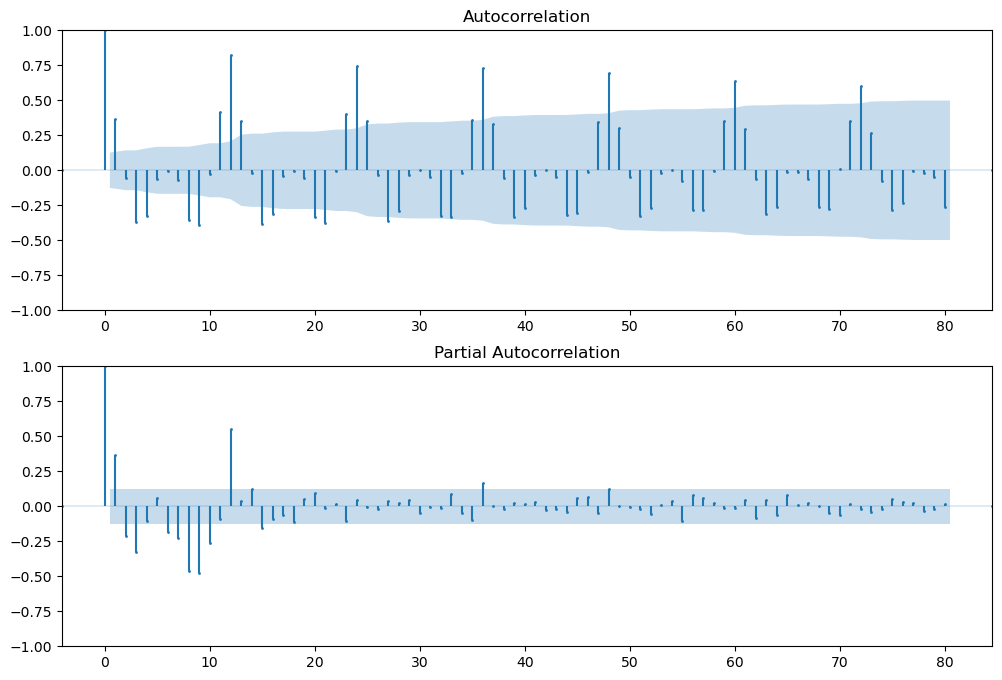

In [9]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data11.values, lags=80, ax=ax1, marker='o', markersize=1,  linewidth=0.2)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data11.values, lags=80, ax=ax2, marker='o', markersize=1,  linewidth=0.2)

adf = adfuller(data11)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

## 뒷부분 trend를 diff로 처리해줘야하는지 여쭤봐야한다.

In [10]:
data2 = pd.read_csv("data/monthly_temperature_nothernhemisphere.csv")
data2.head()

,Year,Month,Temperature
0,1880,1,-0.36
1,1881,1,-0.31
2,1882,1,0.26
3,1883,1,-0.58
4,1884,1,-0.17


In [11]:
data2['Year'] = data2['Year'].astype(str)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1716 non-null   object 
 1   Month        1716 non-null   int64  
 2   Temperature  1716 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.3+ KB


In [12]:
data2['Month'] = data2['Month'].astype(str)
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1716 non-null   object 
 1   Month        1716 non-null   object 
 2   Temperature  1716 non-null   float64
dtypes: float64(1), object(2)
memory usage: 40.3+ KB


In [13]:
data2['Month']=data2['Month'].replace({'1':'01',
                   '2':'02',
                   '3':'03',
                   '4':'04',
                   '5':'05',
                   '6':'06',
                   '7':'07',
                   '8':'08',
                   '9':'09',
                   '10':'10',
                   '11':'11',
                   '12':'12'})

data2.head()

,Year,Month,Temperature
0,1880,01,-0.36
1,1881,01,-0.31
2,1882,01,0.26
3,1883,01,-0.58
4,1884,01,-0.17


In [14]:
data2['YearMonth'] = data2['Year']+'-'+data2['Month']

data2.head()

,Year,Month,Temperature,YearMonth
0,1880,01,-0.36,1880-01
1,1881,01,-0.31,1881-01
2,1882,01,0.26,1882-01
3,1883,01,-0.58,1883-01
4,1884,01,-0.17,1884-01


In [15]:
data2.drop(columns='Year',inplace=True)
data2.drop(columns='Month',inplace=True)
data2.head()


,Temperature,YearMonth
0,-0.36,1880-01
1,-0.31,1881-01
2,0.26,1882-01
3,-0.58,1883-01
4,-0.17,1884-01


In [16]:
data2 = data2.sort_values(by='YearMonth')
data2.head()

,Temperature,YearMonth
0,-0.36,1880-01
143,-0.51,1880-02
286,-0.23,1880-03
429,-0.30,1880-04
572,-0.06,1880-05


In [17]:
data2['YearMonth'] = pd.to_datetime(data2['YearMonth'])

In [18]:
data2.set_index('YearMonth',inplace=True)
#data2 = data2.drop(columns='YearMonth')
data2.head()

,Temperature
YearMonth,
1880-01-01,-0.36
1880-02-01,-0.51
1880-03-01,-0.23
1880-04-01,-0.30
1880-05-01,-0.06


In [19]:
data2.index.freq = data2.index.inferred_freq

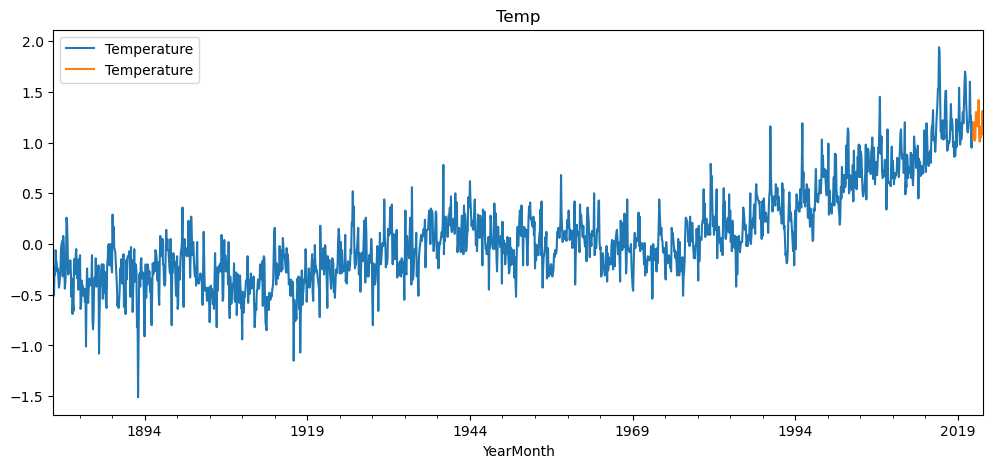

In [20]:
tst_size = 20
trn, tst = data2[:-tst_size], data2[-tst_size:]
#trn = trn.reset_index(drop=True)
#tst = tst.reset_index(drop=True)
ax = trn.plot(title="Temp", label='trn', figsize=(12,5))
tst.plot(label='tst', ax=ax)
plt.legend()
plt.show()

## m값을 어떻게 결정??

ADF Statistic: -0.5124219970406999
p-value: 0.8895695466735335
Critical Values:
	1%: -3.434223006770802
	5%: -2.8632507142793737
	10%: -2.5676807398860144


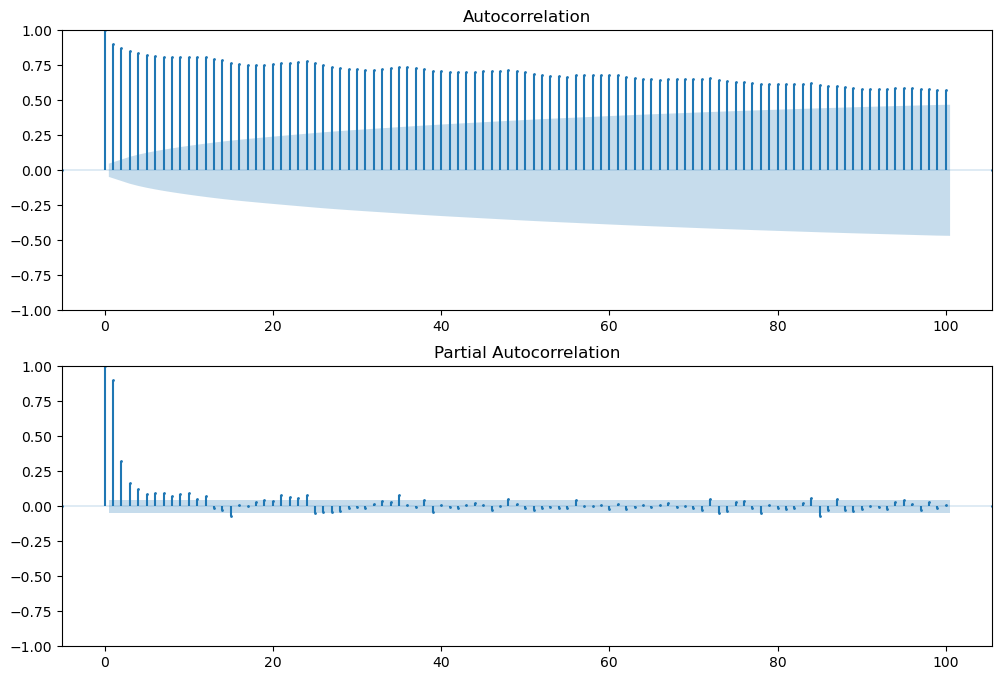

In [21]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data2.values, lags=100, ax=ax1, marker='o', markersize=1,  linewidth=0.2)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data2.values, lags=100, ax=ax2, marker='o', markersize=1,  linewidth=0.2)

adf = adfuller(data2)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

In [22]:
data22 = data2.diff(1)
data22 = data22.dropna()

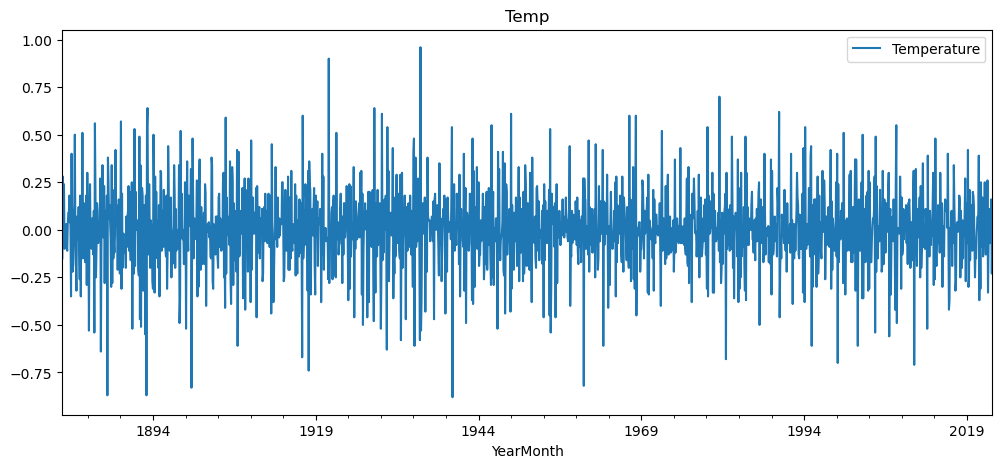

In [23]:
ax = data22.plot(title="Temp", label='trn', figsize=(12,5))
#data.plot(label='tst', ax=ax)
plt.legend()
plt.show()

ADF Statistic: -13.561858041683468
p-value: 2.301875987630388e-25
Critical Values:
	1%: -3.434223006770802
	5%: -2.8632507142793737
	10%: -2.5676807398860144


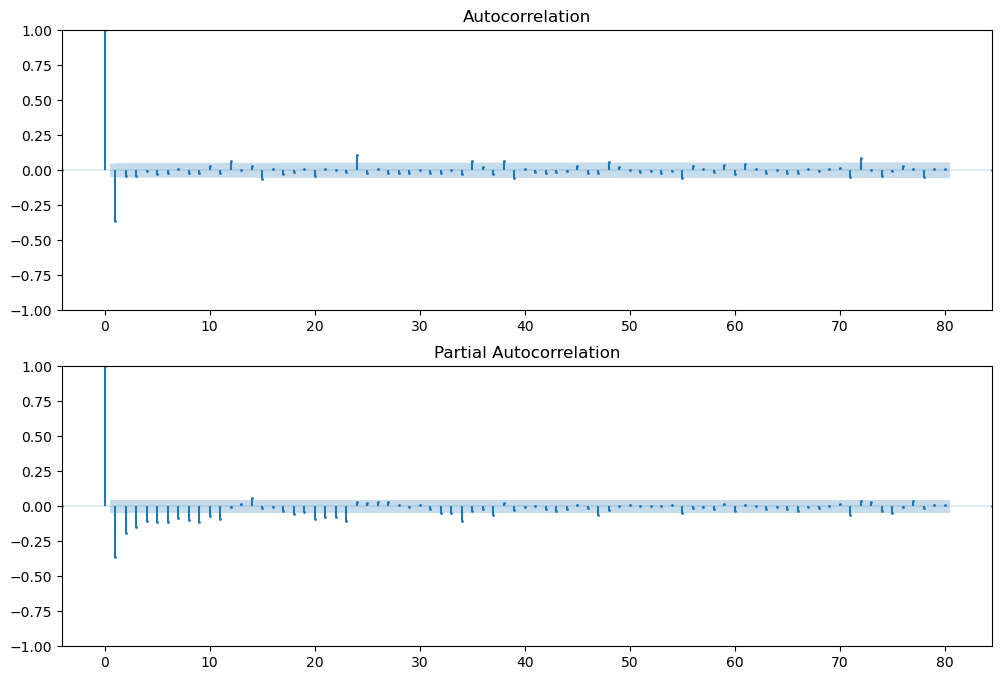

In [24]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data22.values, lags=80, ax=ax1, marker='o', markersize=1,  linewidth=0.2)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data22.values, lags=80, ax=ax2, marker='o', markersize=1,  linewidth=0.2)

adf = adfuller(data22)
print('ADF Statistic: {}'.format(adf[0]))
print('p-value: {}'.format(adf[1]))
print('Critical Values:')
for key, value in adf[4].items():
  print('\t{}: {}'.format(key, value))

q = 1
p = 12

In [25]:
from pmdarima.arima import auto_arima

- m값은 4, 12 

In [26]:
ar_moddel = auto_arima(trn['Temperature'], start_p=1 , start_q=1,
                       max_p=12, max_q = 12, m=12, seasonal=False,
                       d=1, D=0,
                       max_P = 12, max_Q=12,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=False)

#d: stationary 
#D: y_t - 2*m

/home/estsoft/miniconda3/envs/MathAI/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-440.789, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-807.625, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-860.929, Time=0.62 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-890.833, Time=0.75 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-900.697, Time=0.96 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-908.164, Time=1.67 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-675.676, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-895.830, Time=1.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-917.734, Time=1.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-915.739, Time=1.47 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-913.457, Time=1.68 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-737.937, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-915.563, Time=1.22 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-914.819, Time=1.54 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-912.764, Time=1.83 sec
 ARIMA(3,1

In [27]:
ar_moddel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1696
Model:               SARIMAX(1, 1, 2)   Log Likelihood                 463.867
Date:                Tue, 02 Jan 2024   AIC                           -917.734
Time:                        06:23:34   BIC                           -890.557
Sample:                    01-01-1880   HQIC                          -907.672
                         - 04-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      2.049      0.040    1.13e-05       0.001
ar.L1          0.7015      0.041     16.951      0.000       0.620       0.783
ma.L1         -1.2567      0.050    -25.381      0.000      -1.354      -1.160
ma.L2          0.2832      0.045      6.322      0.000       0.195       0.371
sigma2         0.0338      0.001     39.062      0.000       0.032       0.036
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               213.45
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.09
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
pred = ar_moddel.predict(len(tst), return_conf_int=True)
pred_val = pred[0]
print(pred_val)

2021-05-01    1.164644
2021-06-01    1.179068
2021-07-01    1.189446
2021-08-01    1.196986
2021-09-01    1.202535
2021-10-01    1.206688
2021-11-01    1.209861
2021-12-01    1.212347
2022-01-01    1.214351
2022-02-01    1.216018
2022-03-01    1.217446
2022-04-01    1.218709
2022-05-01    1.219855
2022-06-01    1.220919
2022-07-01    1.221925
2022-08-01    1.222892
2022-09-01    1.223830
2022-10-01    1.224748
2022-11-01    1.225652
2022-12-01    1.226547
Freq: MS, dtype: float64


In [29]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

mae : 0.11250701693747737 mape : 0.1005876108867699


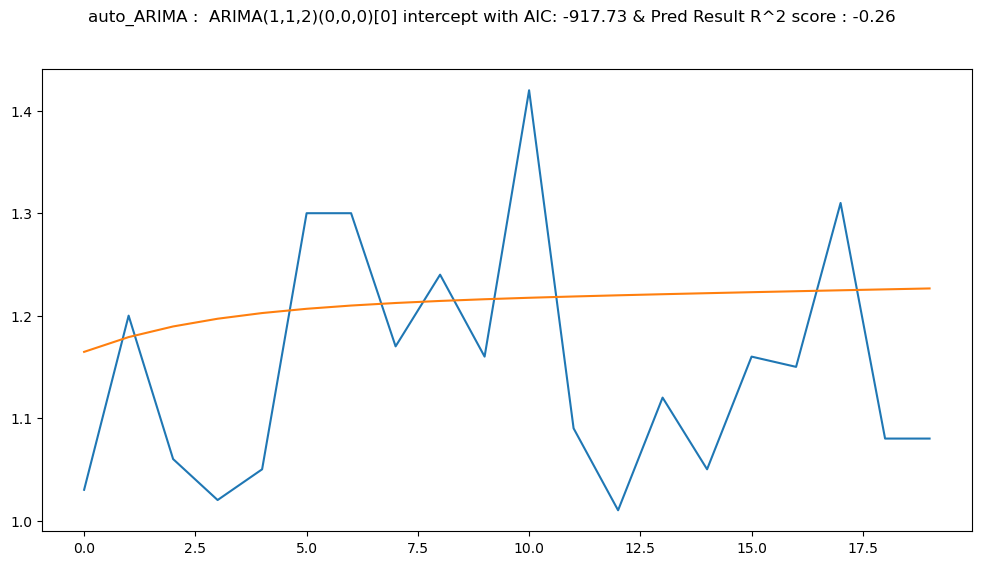

In [30]:
r2 = r2_score(tst['Temperature'], pred_val)
mae = mean_absolute_error(tst['Temperature'], pred_val)
mape = mean_absolute_percentage_error(tst['Temperature'], pred_val)
pred_val.reset_index(drop=True, inplace=True)
tst.reset_index(drop=True, inplace=True)

print("mae :" ,mae ,"mape :",mape)

fig, ax = plt.subplots(figsize=(12, 6))
tst['Temperature'].plot(label='true')
#ax.vlines('1999-08-01', 22000, 26000, linestyle='--',color='r', label='Start of Forecast')
pred_val.plot(label='Prediction')

#ax.legend(loc='upper left')
#plt.grid()
plt.suptitle(f'auto_ARIMA : {ar_moddel} with AIC: {round(ar_moddel.aic(),2)} & Pred Result R^2 score : {round(r2, 2)}')
plt.show()

In [31]:
justarima410 = ARIMA(trn, order=(4,1,2)).fit()

/home/estsoft/miniconda3/envs/MathAI/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/estsoft/miniconda3/envs/MathAI/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/estsoft/miniconda3/envs/MathAI/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
print(justarima410.summary())

                               SARIMAX Results                                
Dep. Variable:            Temperature   No. Observations:                 1696
Model:                 ARIMA(4, 1, 2)   Log Likelihood                 462.770
Date:                Tue, 02 Jan 2024   AIC                           -911.539
Time:                        06:23:36   BIC                           -873.491
Sample:                    01-01-1880   HQIC                          -897.452
                         - 04-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5310      0.104     -5.084      0.000      -0.736      -0.326
ar.L2          0.4861      0.052      9.322      0.000       0.384       0.588
ar.L3          0.1370      0.034      3.976      0.0

In [33]:
data2[-20:]

,Temperature
YearMonth,
2021-05-01,1.03
2021-06-01,1.20
2021-07-01,1.06
2021-08-01,1.02
2021-09-01,1.05
2021-10-01,1.30
2021-11-01,1.30
2021-12-01,1.17
2022-01-01,1.24


In [34]:
data2.index

DatetimeIndex(['1880-01-01', '1880-02-01', '1880-03-01', '1880-04-01',
               '1880-05-01', '1880-06-01', '1880-07-01', '1880-08-01',
               '1880-09-01', '1880-10-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', name='YearMonth', length=1716, freq='MS')

In [35]:
len(data2)

1716

In [36]:
pred2 = justarima410.predict("2021-05-01","2022-12-01")
#pred_val2 = pred2[0]
print(pred2)

2021-05-01    1.165254
2021-06-01    1.169768
2021-07-01    1.189864
2021-08-01    1.183921
2021-09-01    1.199536
2021-10-01    1.191314
2021-11-01    1.203378
2021-12-01    1.194842
2022-01-01    1.204828
2022-02-01    1.196652
2022-03-01    1.205231
2022-04-01    1.197677
2022-05-01    1.205197
2022-06-01    1.198332
2022-07-01    1.204991
2022-08-01    1.198802
2022-09-01    1.204730
2022-10-01    1.199171
2022-11-01    1.204462
2022-12-01    1.199479
Freq: MS, Name: predicted_mean, dtype: float64


mae : 0.10550238385077204 mape : 0.09368129967941627


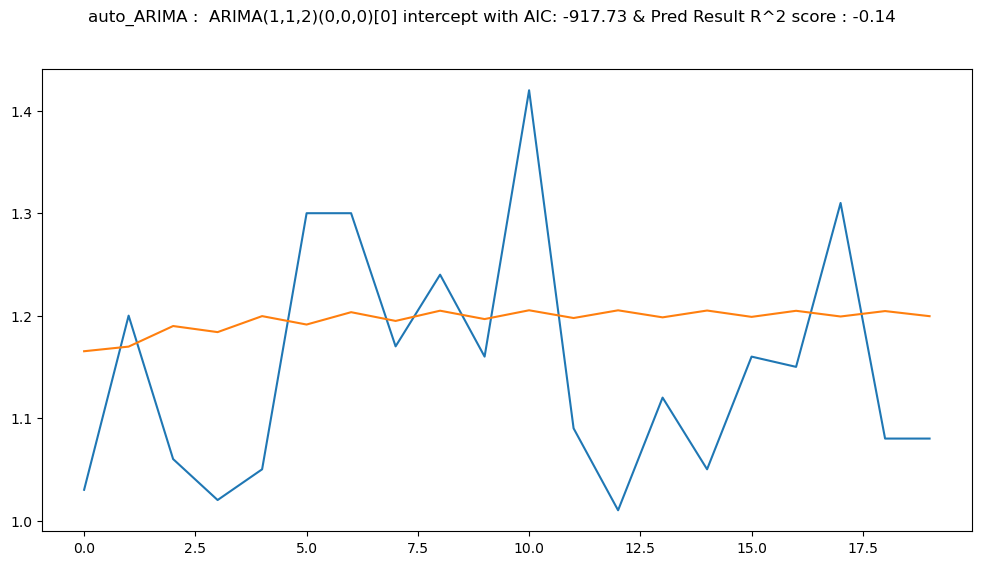

In [37]:
r2 = r2_score(tst['Temperature'], pred2)
mae = mean_absolute_error(tst['Temperature'], pred2)
mape = mean_absolute_percentage_error(tst['Temperature'], pred2)
pred2.reset_index(drop=True, inplace=True)
tst.reset_index(drop=True, inplace=True)

print("mae :" ,mae ,"mape :",mape)

fig, ax = plt.subplots(figsize=(12, 6))
tst['Temperature'].plot(label='true')
#ax.vlines('1999-08-01', 22000, 26000, linestyle='--',color='r', label='Start of Forecast')
pred2.plot(label='Prediction')

#ax.legend(loc='upper left')
#plt.grid()
plt.suptitle(f'auto_ARIMA : {ar_moddel} with AIC: {round(ar_moddel.aic(),2)} & Pred Result R^2 score : {round(r2, 2)}')
plt.show()

In [38]:
ar_moddel2 = auto_arima(trn['Temperature'], start_p=1 , start_q=1,
                       max_p=12, max_q = 3, m=12, seasonal=True,
                       d=1, D=0,
                       max_P = 12, max_Q=12,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=False)

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-440.789, Time=0.19 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-444.231, Time=0.35 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=-460.867, Time=2.98 sec
 ARIMA(0,1,0)(0,0,3)[12] intercept   : AIC=-459.875, Time=2.49 sec
 ARIMA(0,1,0)(0,0,4)[12] intercept   : AIC=-460.925, Time=4.75 sec
 ARIMA(0,1,0)(0,0,5)[12] intercept   : AIC=-464.549, Time=8.38 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-445.412, Time=0.37 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-468.197, Time=1.43 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=-460.678, Time=2.32 sec
 ARIMA(0,1,0)(1,0,3)[12] intercept   : AIC=inf, Time=8.36 sec
 ARIMA(0,1,0)(1,0,4)[12] intercept   : AIC=-464.293, Time=12.54 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=-463.144, Time=1.02 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=-461.512, Time=2.11 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=-471.236, Time=3.23 sec
 ARIMA(0,1,0)(2,0,3)[12] intercept   : AIC=-471.183, Time=10.33 se

: 

In [ ]:
ar_moddel2.summary()

In [ ]:
pred = ar_moddel2.predict(len(tst), return_conf_int=True)
pred_val3 = pred[0]
print(pred_val3)

In [ ]:
r2 = r2_score(tst['Temperature'], pred_val3)
mae = mean_absolute_error(tst['Temperature'], pred_val3)
mape = mean_absolute_percentage_error(tst['Temperature'], pred_val3)
pred_val3.reset_index(drop=True, inplace=True)
tst.reset_index(drop=True, inplace=True)

print("mae :" ,mae ,"mape :",mape)

fig, ax = plt.subplots(figsize=(12, 6))
tst['Temperature'].plot(label='true')
#ax.vlines('1999-08-01', 22000, 26000, linestyle='--',color='r', label='Start of Forecast')
pred_val3.plot(label='Prediction')

#ax.legend(loc='upper left')
#plt.grid()
plt.suptitle(f'auto_ARIMA : {ar_moddel} with AIC: {round(ar_moddel.aic(),2)} & Pred Result R^2 score : {round(r2, 2)}')
plt.show()